## Importing Libraries + Loading Data

In [1]:
import numpy as np 
import scipy as sp
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns 
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

from plotly import __version__
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

import cufflinks as cf

from pprint import pprint

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

from sklearn import metrics
from sklearn.ensemble import ExtraTreesClassifier

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report,confusion_matrix

#import sklearn.cross_validation as cross_validation
#from sklearn.cross_validation import train_test_split
import sklearn.model_selection as model_selection
from sklearn import linear_model

from IPython.display import Image  
from sklearn.externals.six import StringIO  
from sklearn.tree import export_graphviz
import pydot 

import mca

from sklearn.neighbors import KNeighborsClassifier

In [2]:
import os
os.getcwd()

'/Users/angelateng/Documents/GitHub/Projects/Covertype_Prediction/Scripts'

In [3]:
os.chdir('/Users/angelateng/Documents/GitHub/Projects/Covertype_Prediction/Data')
os.getcwd()

'/Users/angelateng/Documents/GitHub/Projects/Covertype_Prediction/Data'

In [4]:
data = open("covtype.data")
data

<_io.TextIOWrapper name='covtype.data' mode='r' encoding='UTF-8'>

In [5]:
data = pd.read_csv("covtype.data", header=None)
#interesting that read csv also works on .data files! 

In [6]:
data.head()

,0,1,2,3,4,5,6,7,8,9,...,45,46,47,48,49,50,51,52,53,54
0,2596,51,3,258,0,510,221,232,148,6279,...,0,0,0,0,0,0,0,0,0,5
1,2590,56,2,212,-6,390,220,235,151,6225,...,0,0,0,0,0,0,0,0,0,5
2,2804,139,9,268,65,3180,234,238,135,6121,...,0,0,0,0,0,0,0,0,0,2
3,2785,155,18,242,118,3090,238,238,122,6211,...,0,0,0,0,0,0,0,0,0,2
4,2595,45,2,153,-1,391,220,234,150,6172,...,0,0,0,0,0,0,0,0,0,5


In [7]:
# set column names 
cols = ['elevation', 'aspect', 'slope', 'horizontal_distance_to_hydrology', 
       'vertical_distance_to_hydrology', 'Horizontal_Distance_To_Roadways', 
       'Hillshade_9am', 'Hillshade_Noon', 'Hillshade_3pm', 'Horizontal_Distance_To_Fire_Points',
       'Wilderness_Area_1', 'Wilderness_Area_2', 'Wilderness_Area_3', 'Wilderness_Area_4', 
       'Soil_Type_1',
        'Soil_Type_2',
        'Soil_Type_3',
        'Soil_Type_4',
        'Soil_Type_5',
        'Soil_Type_6',
        'Soil_Type_7',
        'Soil_Type_8',
        'Soil_Type_9',
        'Soil_Type_10',
        'Soil_Type_11',
        'Soil_Type_12',
        'Soil_Type_13',
        'Soil_Type_14',
        'Soil_Type_15',
        'Soil_Type_16',
        'Soil_Type_17',
        'Soil_Type_18',
        'Soil_Type_19',
        'Soil_Type_20',
        'Soil_Type_21',
        'Soil_Type_22',
        'Soil_Type_23',
        'Soil_Type_24',
        'Soil_Type_25',
        'Soil_Type_26',
        'Soil_Type_27',
        'Soil_Type_28',
        'Soil_Type_29',
        'Soil_Type_30',
        'Soil_Type_31',
        'Soil_Type_32',
        'Soil_Type_33',
        'Soil_Type_34',
        'Soil_Type_35',
        'Soil_Type_36',
        'Soil_Type_37',
        'Soil_Type_38',
        'Soil_Type_39',
        'Soil_Type_40', 
       'Cover_Type']
#cols

In [8]:
data.columns = cols
data.head()

,elevation,aspect,slope,horizontal_distance_to_hydrology,vertical_distance_to_hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type_32,Soil_Type_33,Soil_Type_34,Soil_Type_35,Soil_Type_36,Soil_Type_37,Soil_Type_38,Soil_Type_39,Soil_Type_40,Cover_Type
0,2596,51,3,258,0,510,221,232,148,6279,...,0,0,0,0,0,0,0,0,0,5
1,2590,56,2,212,-6,390,220,235,151,6225,...,0,0,0,0,0,0,0,0,0,5
2,2804,139,9,268,65,3180,234,238,135,6121,...,0,0,0,0,0,0,0,0,0,2
3,2785,155,18,242,118,3090,238,238,122,6211,...,0,0,0,0,0,0,0,0,0,2
4,2595,45,2,153,-1,391,220,234,150,6172,...,0,0,0,0,0,0,0,0,0,5


## Exploratory Data Analysis 

In [9]:
# check data types 
data.dtypes

elevation                             int64
aspect                                int64
slope                                 int64
horizontal_distance_to_hydrology      int64
vertical_distance_to_hydrology        int64
Horizontal_Distance_To_Roadways       int64
Hillshade_9am                         int64
Hillshade_Noon                        int64
Hillshade_3pm                         int64
Horizontal_Distance_To_Fire_Points    int64
Wilderness_Area_1                     int64
Wilderness_Area_2                     int64
Wilderness_Area_3                     int64
Wilderness_Area_4                     int64
Soil_Type_1                           int64
Soil_Type_2                           int64
Soil_Type_3                           int64
Soil_Type_4                           int64
Soil_Type_5                           int64
Soil_Type_6                           int64
Soil_Type_7                           int64
Soil_Type_8                           int64
Soil_Type_9                     

In [10]:
data.info()
# no null values 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 581012 entries, 0 to 581011
Data columns (total 55 columns):
elevation                             581012 non-null int64
aspect                                581012 non-null int64
slope                                 581012 non-null int64
horizontal_distance_to_hydrology      581012 non-null int64
vertical_distance_to_hydrology        581012 non-null int64
Horizontal_Distance_To_Roadways       581012 non-null int64
Hillshade_9am                         581012 non-null int64
Hillshade_Noon                        581012 non-null int64
Hillshade_3pm                         581012 non-null int64
Horizontal_Distance_To_Fire_Points    581012 non-null int64
Wilderness_Area_1                     581012 non-null int64
Wilderness_Area_2                     581012 non-null int64
Wilderness_Area_3                     581012 non-null int64
Wilderness_Area_4                     581012 non-null int64
Soil_Type_1                           581012 non-

**Goal: predict cover type given the other variables (7 cover types )**

In [11]:
data['Cover_Type'].describe()

count    581012.000000
mean          2.051471
std           1.396504
min           1.000000
25%           1.000000
50%           2.000000
75%           2.000000
max           7.000000
Name: Cover_Type, dtype: float64

In [12]:
#sns.distplot(data['Cover_Type'])
#not sure histogram is what we want, kind of just want a bar chart

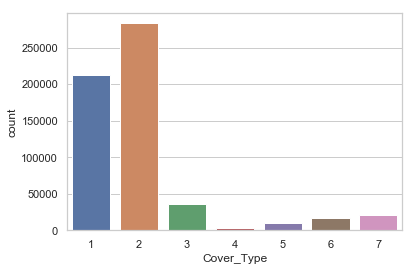

In [12]:
sns.set(style="whitegrid")
#ax = sns.barplot(x="Cover_Type", y ="Count", data=data['Cover_Type'])
sns.countplot(data['Cover_Type'])

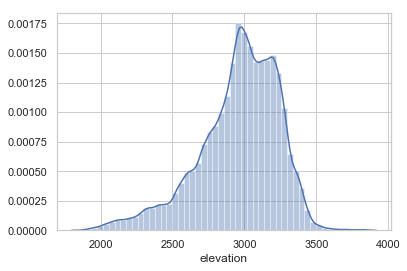

In [14]:
sns.distplot(data['elevation'])
#measured in meters

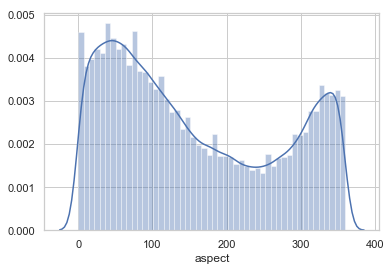

In [15]:
sns.distplot(data['aspect'])
#measured in azimuth

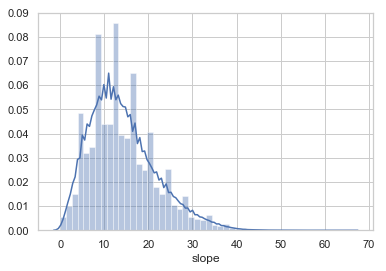

In [16]:
sns.distplot(data['slope'])
#measured in degrees

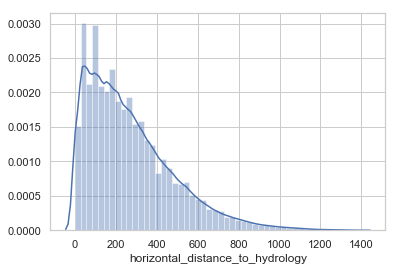

In [17]:
sns.distplot(data['horizontal_distance_to_hydrology'])
#meters

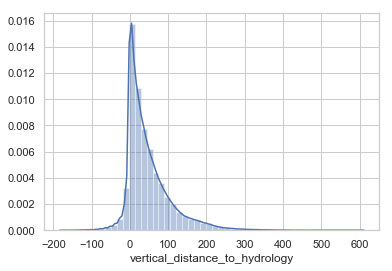

In [18]:
sns.distplot(data['vertical_distance_to_hydrology'])
#meters
#what is a negative vertical distance?
#whyy are sns charts so small

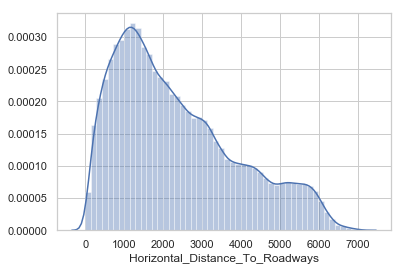

In [19]:
sns.distplot(data['Horizontal_Distance_To_Roadways'])
#meters

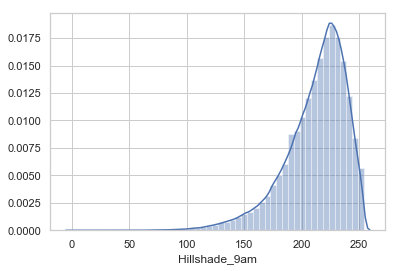

In [20]:
sns.distplot(data['Hillshade_9am'])
#index from 0-255

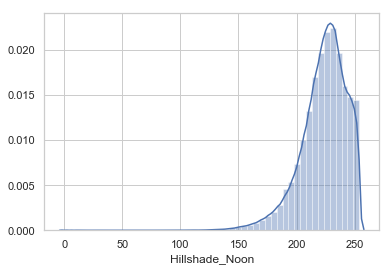

In [21]:
sns.distplot(data['Hillshade_Noon'])

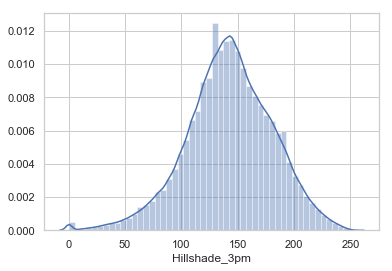

In [22]:
sns.distplot(data['Hillshade_3pm'])

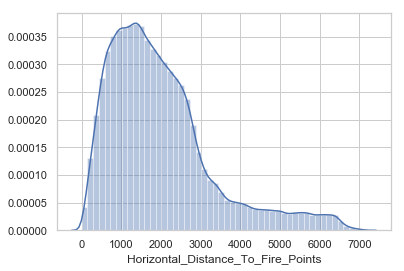

In [23]:
sns.distplot(data['Horizontal_Distance_To_Fire_Points'])
#meters

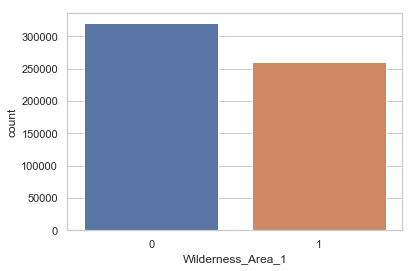

In [24]:
sns.countplot(data['Wilderness_Area_1'])

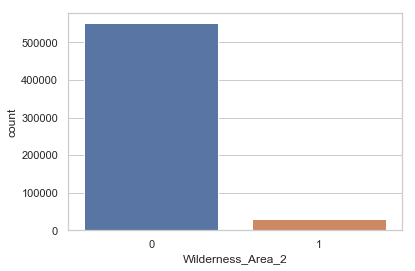

In [25]:
sns.countplot(data['Wilderness_Area_2'])

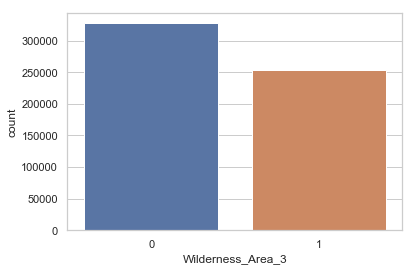

In [26]:
sns.countplot(data['Wilderness_Area_3'])

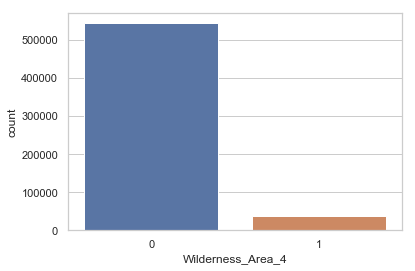

In [27]:
sns.countplot(data['Wilderness_Area_4'])

In [21]:
#plotting multiple binary categorical variables?
data.groupby('Cover_Type').describe()

Hillshade_3pm                                                   \
                   count        mean        std  min    25%    50%    75%   
Cover_Type                                                                  
1               211840.0  143.875038  36.041583  0.0  121.0  144.0  168.0   
2               283301.0  142.983466  36.223845  0.0  120.0  142.0  167.0   
3                35754.0  140.367176  52.481434  0.0  104.0  142.0  181.0   
4                 2747.0  111.392792  49.264367  0.0   74.0  113.0  149.0   
5                 9493.0  121.920889  49.400832  0.0   85.0  128.0  157.0   
6                17367.0  148.284044  45.384632  0.0  116.0  150.0  184.0   
7                20510.0  134.932033  38.937654  0.0  113.0  140.0  161.0   

                  Hillshade_9am              ...   slope        \
              max         count        mean  ...     75%   max   
Cover_Type                                   ...                 
1           254.0      211840.0  211.998782  ...    17.0  56.0   
2           254.0      283301.0  213.844423  ...    18.0  66.0   
3           251.0       35754.0  201.918415  ...    27.0  50.0   
4           232.0        2747.0  228.345832  ...    26.0  46.0   
5           236.0        9493.0  223.474876  ...    22.0  51.0   
6           248.0       17367.0  192.844302  ...    25.0  54.0   
7           229.0       20510.0  216.967723  ...    18.0  51.0   

           vertical_distance_to_hydrology                                     \
                                    count       mean        std    min   25%   
Cover_Type                                                                     
1                                211840.0  42.156939  56.628398 -156.0   4.0   
2                                283301.0  45.884219  57.487644 -173.0   8.0   
3                                 35754.0  62.446915  58.911774 -134.0  18.0   
4                                  2747.0  41.186749  59.052920  -25.0   0.0   
5                                  9493.0  50.610344  57.827970 -134.0   6.0   
6                                 17367.0  45.437439  46.987262 -126.0   8.0   
7                                 20510.0  69.474305  79.882861  -84.0   8.0   

                                
             50%    75%    max  
Cover_Type                      
1           24.0   62.0  431.0  
2           30.0   66.0  601.0  
3           50.0   95.0  312.0  
4            6.0   72.0  270.0  
5           35.0   81.0  265.0  
6           34.0   73.0  288.0  
7           43.0  107.0  412.0  

[7 rows x 432 columns]

In [19]:
data.describe()

,elevation,aspect,slope,horizontal_distance_to_hydrology,vertical_distance_to_hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type_32,Soil_Type_33,Soil_Type_34,Soil_Type_35,Soil_Type_36,Soil_Type_37,Soil_Type_38,Soil_Type_39,Soil_Type_40,Cover_Type
count,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,...,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000
mean,2959.365301,155.656807,14.103704,269.428217,46.418855,2350.146611,212.146049,223.318716,142.528263,1980.291226,...,0.090392,0.077716,0.002773,0.003255,0.000205,0.000513,0.026803,0.023762,0.015060,2.051471
std,279.984734,111.913721,7.488242,212.549356,58.295232,1559.254870,26.769889,19.768697,38.274529,1324.195210,...,0.286743,0.267725,0.052584,0.056957,0.014310,0.022641,0.161508,0.152307,0.121791,1.396504
min,1859.000000,0.000000,0.000000,0.000000,-173.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2809.000000,58.000000,9.000000,108.000000,7.000000,1106.000000,198.000000,213.000000,119.000000,1024.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,2996.000000,127.000000,13.000000,218.000000,30.000000,1997.000000,218.000000,226.000000,143.000000,1710.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
75%,3163.000000,260.000000,18.000000,384.000000,69.000000,3328.000000,231.000000,237.000000,168.000000,2550.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
max,3858.000000,360.000000,66.000000,1397.000000,601.000000,7117.000000,254.000000,254.000000,254.000000,7173.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,7.000000


In [30]:
#sns.pairplot(data) 
#this won't run, too big

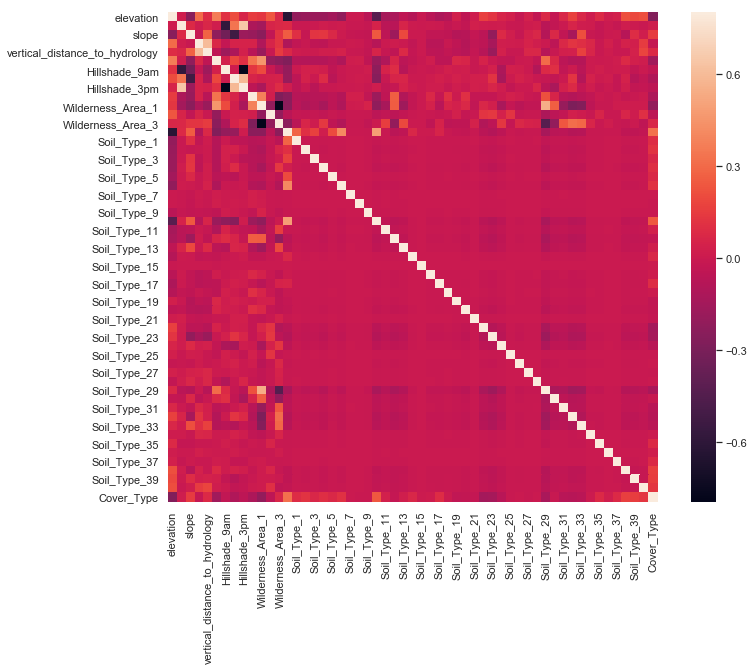

In [31]:
#correlation matrix
corrmat = data.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True);
#elevation seems important

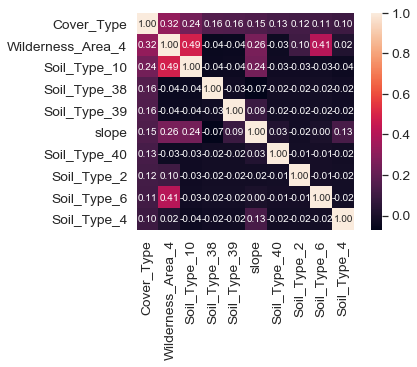

In [32]:
#numbered/labeled corr matrix, to see var importance 
k = 10 #number of variables for heatmap
cols = corrmat.nlargest(k, 'Cover_Type')['Cover_Type'].index
cm = np.corrcoef(data[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

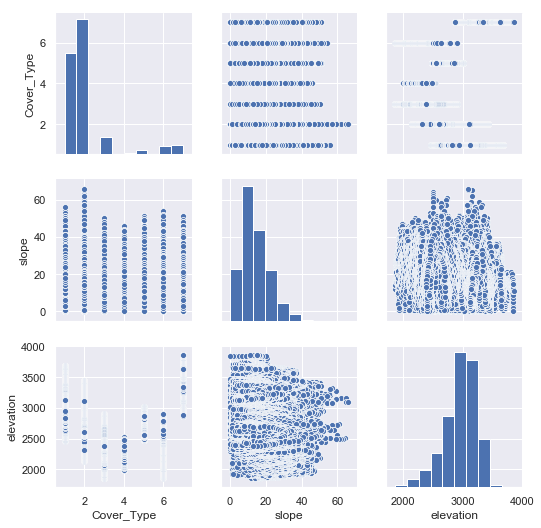

In [33]:
#scatterplot between cover type, slope and elevation
sns.set()
cols2 = ['Cover_Type', 'slope', 'elevation']
sns.pairplot(data[cols2], size = 2.5)
plt.show();

#not 100% sure how to read this to be honest

In [34]:
#based on this plot and the corr matrix, the vars that seem most correlated with covertype are aspect, slope, and elevation

In [12]:
plt.style.use('ggplot')

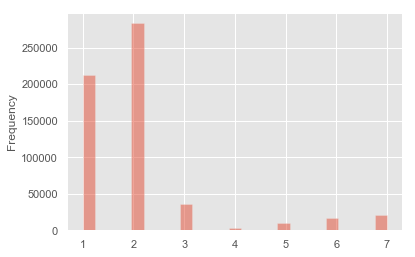

In [36]:
data['Cover_Type'].plot.hist(alpha=0.5,bins=25)

In [37]:
#data[data['Cover_Type']==1].plot.box()

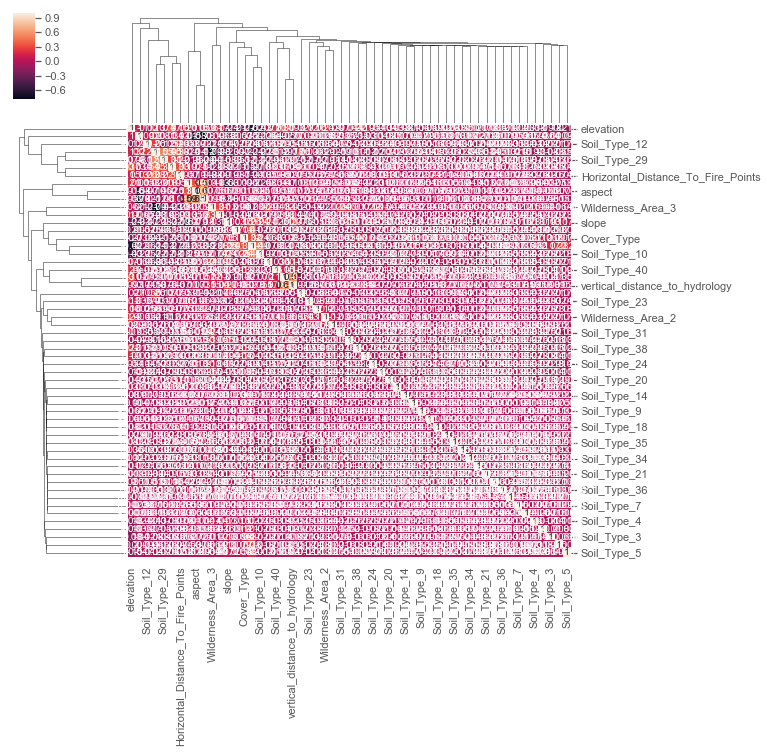

In [42]:
sns.clustermap(data.corr(),annot=True)

In [40]:
#sns.clustermap(data, metric="correlation")

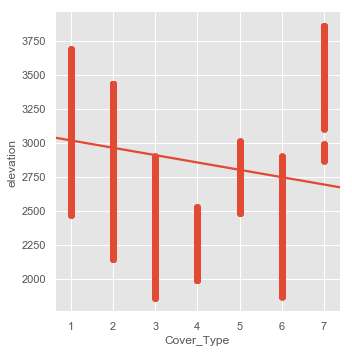

In [39]:
sns.lmplot(x='Cover_Type',y='elevation',data=data)

In [ ]:
#sns.pairplot(data,hue='Cover_Type',palette='rainbow')
#data set too big, doesn't run

In [21]:
#average elevation per cover type
avg_elevation = data["elevation"].mean()
#avg_elevation
#sns.boxplot(x=avg_elevation, y="Cover_Type", data=data,palette='rainbow')
data["elevation"].groupby(data['Cover_Type']).mean()

Cover_Type
1    3128.644888
2    2920.936061
3    2394.509845
4    2223.939934
5    2787.417571
6    2419.181897
7    3361.928669
Name: elevation, dtype: float64

In [22]:
#Average slope per covertype
data["slope"].groupby(data['Cover_Type']).mean()

Cover_Type
1    13.127110
2    13.550499
3    20.770208
4    18.528941
5    16.641315
6    19.048886
7    14.255924
Name: slope, dtype: float64

In [23]:
#average aspect per covertype
data["aspect"].groupby(data['Cover_Type']).mean()

Cover_Type
1    156.138227
2    152.060515
3    176.372490
4    137.139425
5    139.283051
6    180.539068
7    153.236226
Name: aspect, dtype: float64

In [24]:
#horizontal distance to hydrology
data["horizontal_distance_to_hydrology"].groupby(data['Cover_Type']).mean()

Cover_Type
1    270.555245
2    279.916442
3    210.276473
4    106.934838
5    212.354893
6    159.853458
7    356.994686
Name: horizontal_distance_to_hydrology, dtype: float64

In [26]:
#vertical_distance_to_hydrology
data["vertical_distance_to_hydrology"].groupby(data['Cover_Type']).mean()

Cover_Type
1    42.156939
2    45.884219
3    62.446915
4    41.186749
5    50.610344
6    45.437439
7    69.474305
Name: vertical_distance_to_hydrology, dtype: float64

In [ ]:
#sns.boxplot(x="elevation", y="Cover_Type", data=data,palette='rainbow')
#wow none of the viz work.

In [ ]:
#data.iplot(kind='scatter',x='elevation',y='Cover_Type',mode='markers',size=10)
#also doesn't run.... 

In [11]:
#data.iplot(kind='box')

In [23]:
cov_dummy = pd.get_dummies(data['Cover_Type'])
cov_dummy.head()

,1,2,3,4,5,6,7
0,0,0,0,0,1,0,0
1,0,0,0,0,1,0,0
2,0,1,0,0,0,0,0
3,0,1,0,0,0,0,0
4,0,0,0,0,1,0,0


In [24]:
df4 = pd.concat([cov_dummy, data], axis = 1)
df4.head()

,1,2,3,4,5,6,7,elevation,aspect,slope,...,Soil_Type_32,Soil_Type_33,Soil_Type_34,Soil_Type_35,Soil_Type_36,Soil_Type_37,Soil_Type_38,Soil_Type_39,Soil_Type_40,Cover_Type
0,0,0,0,0,1,0,0,2596,51,3,...,0,0,0,0,0,0,0,0,0,5
1,0,0,0,0,1,0,0,2590,56,2,...,0,0,0,0,0,0,0,0,0,5
2,0,1,0,0,0,0,0,2804,139,9,...,0,0,0,0,0,0,0,0,0,2
3,0,1,0,0,0,0,0,2785,155,18,...,0,0,0,0,0,0,0,0,0,2
4,0,0,0,0,1,0,0,2595,45,2,...,0,0,0,0,0,0,0,0,0,5


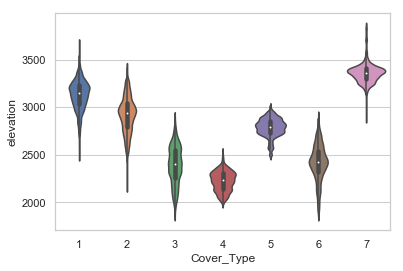

In [26]:
sns.violinplot(data = data, x='Cover_Type', y='elevation')
#sns.swarmplot(data = ds_cat, x='Cover_Type', y='elevation', color = 'k', alpha = 0.6)

In [28]:
#fig = plt.figure()

#ax1 = fig.add_subplot(2,1,1) 
#sns.countplot(data = data, x = 'Cover_Type', ax = ax1)

#ax2 = fig.add_subplot(2,1,2) 
#sns.boxplot(data = ds_cat, x='Cover_Type', y='elevation' , ax = ax2)

In [30]:
#data.hist(figsize=(16, 20), bins=50, xlabelsize=8, ylabelsize=8)

In [31]:
cov_type_corr = data.corr()['Cover_Type'][:-1]

In [32]:
cov_type_corr

elevation                            -0.269554
aspect                                0.017080
slope                                 0.148285
horizontal_distance_to_hydrology     -0.020317
vertical_distance_to_hydrology        0.081664
Horizontal_Distance_To_Roadways      -0.153450
Hillshade_9am                        -0.035415
Hillshade_Noon                       -0.096426
Hillshade_3pm                        -0.048290
Horizontal_Distance_To_Fire_Points   -0.108936
Wilderness_Area_1                    -0.203913
Wilderness_Area_2                    -0.048059
Wilderness_Area_3                     0.066846
Wilderness_Area_4                     0.323200
Soil_Type_1                           0.090828
Soil_Type_2                           0.118135
Soil_Type_3                           0.068064
Soil_Type_4                           0.099672
Soil_Type_5                           0.077890
Soil_Type_6                           0.112958
Soil_Type_7                          -0.000496
Soil_Type_8  

In [33]:
golden_features_list = cov_type_corr[abs(cov_type_corr) > 0.5].sort_values(ascending=False)
print("There is {} strongly correlated values with Cover Type:\n{}".format(len(golden_features_list), golden_features_list))

There is 0 strongly correlated values with Cover Type:
Series([], Name: Cover_Type, dtype: float64)


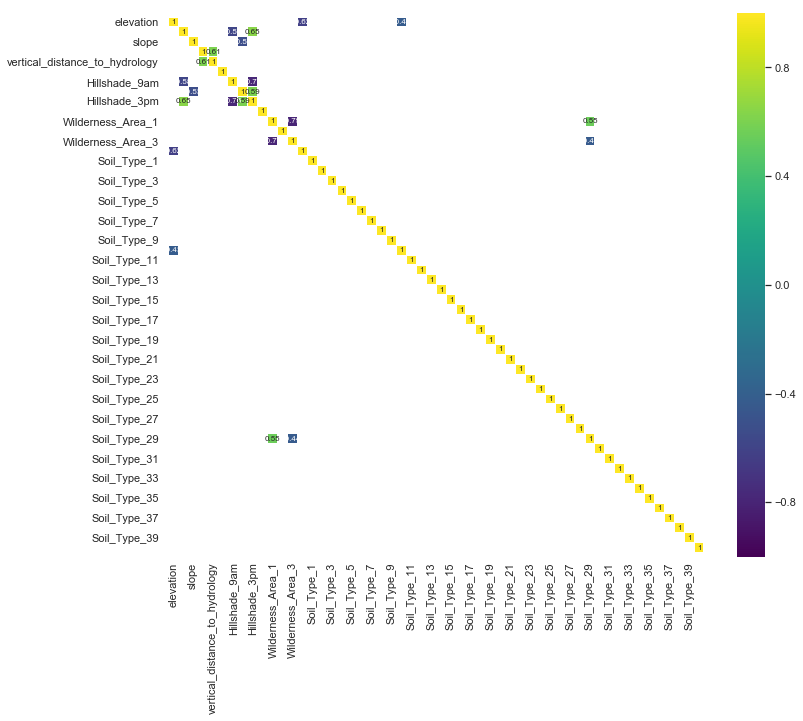

In [34]:
corr = data.drop('Cover_Type', axis=1).corr() 
plt.figure(figsize=(12, 10))

sns.heatmap(corr[(corr >= 0.5) | (corr <= -0.4)], 
            cmap='viridis', vmax=1.0, vmin=-1.0, linewidths=0.1,
            annot=True, annot_kws={"size": 8}, square=True);

### Feature Importance 

#### Recursive Feature Elimination

In [34]:
# create a base classifier used to evaluate a subset of attributes
model_1 = LogisticRegression()

In [23]:
# set x and y columns 
X = data.loc[:, data.columns != 'Cover_Type']
X.head()

,elevation,aspect,slope,horizontal_distance_to_hydrology,vertical_distance_to_hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type_31,Soil_Type_32,Soil_Type_33,Soil_Type_34,Soil_Type_35,Soil_Type_36,Soil_Type_37,Soil_Type_38,Soil_Type_39,Soil_Type_40
0,2596,51,3,258,0,510,221,232,148,6279,...,0,0,0,0,0,0,0,0,0,0
1,2590,56,2,212,-6,390,220,235,151,6225,...,0,0,0,0,0,0,0,0,0,0
2,2804,139,9,268,65,3180,234,238,135,6121,...,0,0,0,0,0,0,0,0,0,0
3,2785,155,18,242,118,3090,238,238,122,6211,...,0,0,0,0,0,0,0,0,0,0
4,2595,45,2,153,-1,391,220,234,150,6172,...,0,0,0,0,0,0,0,0,0,0


In [24]:
y = data.loc[:, data.columns == 'Cover_Type']
y.head()

,Cover_Type
0,5
1,5
2,2
3,2
4,5


In [39]:
# create RFE model and select 10 attributes
rfe = RFE(model_1,3)
#rfe = rfe.fit(dataset.data, dataset.target)
#rfe = rfe.fit(x, y)
# this is not running!! dataset may be too large!!

In [40]:
# summarize the selection of the attributes
#print(rfe.support_)
#print(rfe.ranking_)

"The Recursive Feature Elimination (RFE) method is a feature selection approach. It works by recursively removing attributes and building a model on those attributes that remain. It uses the model accuracy to identify which attributes (and combination of attributes) contribute the most to predicting the target attribute."

#### Feature Importance

In [41]:
# fit an Extra Trees model to the data
model_2 = ExtraTreesClassifier()

In [42]:
model_2.fit(x, y)

ExtraTreesClassifier(bootstrap=False, class_weight=None, criterion='gini',
           max_depth=None, max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [43]:
# display the relative importance of each attribute
print(model_2.feature_importances_)

[1.93531786e-01 5.16651959e-02 3.66334450e-02 6.41293025e-02
 5.83864537e-02 1.10567752e-01 4.41325688e-02 4.55603448e-02
 4.36743288e-02 1.07306942e-01 1.09067784e-02 4.57668861e-03
 1.55499113e-02 4.59837010e-02 4.90081710e-04 9.65907338e-03
 2.95786706e-03 1.36223534e-02 5.01530566e-04 2.34436447e-03
 5.77913003e-05 6.24690666e-05 2.17718903e-04 6.30405992e-03
 4.18464359e-03 1.59997651e-02 5.64146403e-03 5.16794193e-04
 3.96691450e-06 9.50400115e-04 2.11437461e-03 5.13827915e-04
 9.78224251e-04 1.87615595e-03 1.03740283e-03 1.91985673e-02
 1.19015673e-02 4.12929370e-03 2.54288209e-04 8.00448609e-04
 8.97738371e-04 3.38817262e-04 5.20418209e-03 3.76353248e-03
 3.05509274e-03 4.48562995e-03 3.90822947e-03 8.46245474e-04
 2.32841430e-03 1.01950309e-04 9.27710689e-04 1.31282148e-02
 1.39437098e-02 8.14683932e-03]


In [52]:
x_cols = cols[:54]
#x_cols

In [54]:
feat_impt_val = pd.DataFrame([model_2.feature_importances_], index=None)
feat_impt_val.columns = x_cols
#feat_impt_val.columns = cols
#ValueError: Length mismatch: Expected axis has 54 elements, new values have 55 elements
feat_impt_val

,elevation,aspect,slope,horizontal_distance_to_hydrology,vertical_distance_to_hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type_31,Soil_Type_32,Soil_Type_33,Soil_Type_34,Soil_Type_35,Soil_Type_36,Soil_Type_37,Soil_Type_38,Soil_Type_39,Soil_Type_40
0,0.193532,0.051665,0.036633,0.064129,0.058386,0.110568,0.044133,0.04556,0.043674,0.107307,...,0.003055,0.004486,0.003908,0.000846,0.002328,0.000102,0.000928,0.013128,0.013944,0.008147


It seems like elevation, aspect, and slope are the three most important features.

## Training and Testing Set

In [63]:
# train test split
X_train = x
X_train.head()

,elevation,aspect,slope,horizontal_distance_to_hydrology,vertical_distance_to_hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type_31,Soil_Type_32,Soil_Type_33,Soil_Type_34,Soil_Type_35,Soil_Type_36,Soil_Type_37,Soil_Type_38,Soil_Type_39,Soil_Type_40
0,2596,51,3,258,0,510,221,232,148,6279,...,0,0,0,0,0,0,0,0,0,0
1,2590,56,2,212,-6,390,220,235,151,6225,...,0,0,0,0,0,0,0,0,0,0
2,2804,139,9,268,65,3180,234,238,135,6121,...,0,0,0,0,0,0,0,0,0,0
3,2785,155,18,242,118,3090,238,238,122,6211,...,0,0,0,0,0,0,0,0,0,0
4,2595,45,2,153,-1,391,220,234,150,6172,...,0,0,0,0,0,0,0,0,0,0


In [64]:
Y_train = y
Y_train.head()

,Cover_Type
0,5
1,5
2,2
3,2
4,5


In [65]:
X_train.shape

(581012, 54)

In [66]:
Y_train.shape
#sanity check that the number of samples matches

(581012, 1)

In [73]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(x, y, train_size=0.70, random_state=101)

In [75]:
print ("X_train: ", X_train.head())
print ("y_train: ", y_train.head())
print("X_test: ", X_test.head())
print ("y_test: ", y_test.head())

X_train:          elevation  aspect  slope  horizontal_distance_to_hydrology  \
87246        3021     326      5                               210   
363109       3121      67     12                                67   
303804       2340     122     18                                85   
346648       2769      93     32                               319   
275261       2908     247     10                               391   

        vertical_distance_to_hydrology  Horizontal_Distance_To_Roadways  \
87246                               30                             2919   
363109                               7                             2910   
303804                              10                              417   
346648                             149                              642   
275261                             -67                             1146   

        Hillshade_9am  Hillshade_Noon  Hillshade_3pm  \
87246             207             234            166   
363109

In [79]:
#linear regression - trying to see which vars are most important, even tho y is categorical.... also should be doing logisitic but how do we do this on categorical data
lm = linear_model.LinearRegression()

In [83]:
model_1 = lm.fit(X_train,y_train)

In [84]:
model_1

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [85]:
predictions = lm.predict(X_train)
print(predictions)

[[1.81233721]
 [1.71394526]
 [3.69906217]
 ...
 [0.89648573]
 [2.94185698]
 [0.99012173]]


In [86]:
#R squared of the model 
lm.score(X_train,y_train)

0.318113734609472

In [87]:
lm.coef_

array([[-1.14831566e-03,  3.43148382e-04, -4.09742177e-03,
         1.96729548e-05,  6.98748249e-04,  1.09396450e-05,
        -2.83727205e-04,  2.94607387e-03, -3.13578360e-03,
         2.89994886e-05, -6.98066899e-01, -1.88791153e-01,
         1.86311208e-01,  7.00546843e-01, -3.95870505e-01,
         3.27515316e-04, -6.40049801e-01, -2.81751228e-01,
        -3.75292858e-02, -4.28552753e-01, -1.09323892e-01,
        -2.98692349e-01, -4.90779323e-01, -1.17350930e-01,
        -7.49298852e-01, -2.74161881e-01, -6.12550140e-01,
         1.07862982e+00,  1.79726904e+00, -2.49291353e-01,
         3.17939935e-01, -2.45528487e-01, -6.19519058e-01,
        -5.89856701e-01, -1.51671773e+00, -7.86333943e-01,
        -7.26823865e-01, -9.78759915e-01, -4.75480332e-01,
        -9.03387553e-01, -1.01840882e+00, -9.21397489e-01,
        -2.31377219e-01, -4.63964953e-02, -1.07397415e+00,
        -9.16575295e-01, -9.62003853e-01, -6.15406271e-01,
         2.03888004e+00,  2.12502621e+00,  5.35203208e+0

In [88]:
lm.intercept_

array([5.7758075])

In [29]:
# WAS DOING THE ABOVE WRONG, THIS IS HOW YOU DO IT:
#X = data.drop(data['Cover_Type'], axis=1)
#y = data['Cover_Type']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

### Decision Trees 
(Since Categorical)

In [32]:
dtree = DecisionTreeClassifier()
dtree

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [33]:
dtree.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

#### Prediction & Evaluation

In [34]:
predictions = dtree.predict(X_test)

In [36]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           1       0.93      0.93      0.93     63408
           2       0.95      0.95      0.95     85038
           3       0.92      0.93      0.92     10766
           4       0.82      0.81      0.81       824
           5       0.82      0.82      0.82      2841
           6       0.87      0.87      0.87      5284
           7       0.94      0.94      0.94      6143

   micro avg       0.94      0.94      0.94    174304
   macro avg       0.89      0.89      0.89    174304
weighted avg       0.94      0.94      0.94    174304



In [37]:
print(confusion_matrix(y_test,predictions))
#not sure how to read this

[[59253  3780     3     0    46     9   317]
 [ 3729 80413   270     1   401   177    47]
 [    4   228  9982    94    37   421     0]
 [    0     3   110   664     0    47     0]
 [   59   400    31     0  2338    13     0]
 [   14   204   426    49    15  4576     0]
 [  319    39     0     0     3     0  5782]]


#### Tree Viz

In [43]:
features = list(data.columns[:54])
features

['elevation',
 'aspect',
 'slope',
 'horizontal_distance_to_hydrology',
 'vertical_distance_to_hydrology',
 'Horizontal_Distance_To_Roadways',
 'Hillshade_9am',
 'Hillshade_Noon',
 'Hillshade_3pm',
 'Horizontal_Distance_To_Fire_Points',
 'Wilderness_Area_1',
 'Wilderness_Area_2',
 'Wilderness_Area_3',
 'Wilderness_Area_4',
 'Soil_Type_1',
 'Soil_Type_2',
 'Soil_Type_3',
 'Soil_Type_4',
 'Soil_Type_5',
 'Soil_Type_6',
 'Soil_Type_7',
 'Soil_Type_8',
 'Soil_Type_9',
 'Soil_Type_10',
 'Soil_Type_11',
 'Soil_Type_12',
 'Soil_Type_13',
 'Soil_Type_14',
 'Soil_Type_15',
 'Soil_Type_16',
 'Soil_Type_17',
 'Soil_Type_18',
 'Soil_Type_19',
 'Soil_Type_20',
 'Soil_Type_21',
 'Soil_Type_22',
 'Soil_Type_23',
 'Soil_Type_24',
 'Soil_Type_25',
 'Soil_Type_26',
 'Soil_Type_27',
 'Soil_Type_28',
 'Soil_Type_29',
 'Soil_Type_30',
 'Soil_Type_31',
 'Soil_Type_32',
 'Soil_Type_33',
 'Soil_Type_34',
 'Soil_Type_35',
 'Soil_Type_36',
 'Soil_Type_37',
 'Soil_Type_38',
 'Soil_Type_39',
 'Soil_Type_40']

In [44]:
dot_data = StringIO()  
export_graphviz(dtree, out_file=dot_data,feature_names=features,filled=True,rounded=True)

In [ ]:
#graph = pydot.graph_from_dot_data(dot_data.getvalue())  
#Image(graph[0].create_png())  

### Dimensionality Reduction

"Multiple Correspondence Analysis (MCA), which is an extension of principal component analysis when the variables to be analyzed are categorical instead of quantitative (which is the case here with your binary variables). See for instance Husson et al. (2010), or Abdi and Valentin (2007)." https://stats.stackexchange.com/questions/159705/would-pca-work-for-boolean-binary-data-types

In [ ]:
src_index = (['Cover_Type1'] * 7 + ['Expert 2'] * 9 + ['Expert 3'] * 6)

In [48]:
#drop cols except 3 most "important".... lol bad practice but... just trying stuff

#### Cluster Analysis

In [ ]:
## KNN 

In [25]:
scaler = StandardScaler()

In [26]:
scaler.fit(data.drop('Cover_Type',axis=1))

StandardScaler(copy=True, with_mean=True, with_std=True)

In [27]:
scaled_features = scaler.transform(data.drop('Cover_Type',axis=1))

In [37]:
df_feat = pd.DataFrame(scaled_features,columns=data.columns[:-1])
df_feat.head()

,elevation,aspect,slope,horizontal_distance_to_hydrology,vertical_distance_to_hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type_31,Soil_Type_32,Soil_Type_33,Soil_Type_34,Soil_Type_35,Soil_Type_36,Soil_Type_37,Soil_Type_38,Soil_Type_39,Soil_Type_40
0,-1.297805,-0.935157,-1.482820,-0.053767,-0.796273,-1.180146,0.330743,0.439143,0.142960,3.246283,...,-0.21498,-0.315238,-0.290284,-0.05273,-0.057143,-0.014313,-0.022653,-0.165956,-0.156014,-0.123654
1,-1.319235,-0.890480,-1.616363,-0.270188,-0.899197,-1.257106,0.293388,0.590899,0.221342,3.205504,...,-0.21498,-0.315238,-0.290284,-0.05273,-0.057143,-0.014313,-0.022653,-0.165956,-0.156014,-0.123654
2,-0.554907,-0.148836,-0.681563,-0.006719,0.318742,0.532212,0.816364,0.742654,-0.196691,3.126965,...,-0.21498,-0.315238,-0.290284,-0.05273,-0.057143,-0.014313,-0.022653,-0.165956,-0.156014,-0.123654
3,-0.622768,-0.005869,0.520322,-0.129044,1.227908,0.474492,0.965786,0.742654,-0.536343,3.194931,...,-0.21498,-0.315238,-0.290284,-0.05273,-0.057143,-0.014313,-0.022653,-0.165956,-0.156014,-0.123654
4,-1.301377,-0.988770,-1.616363,-0.547771,-0.813427,-1.256464,0.293388,0.540313,0.195215,3.165479,...,-0.21498,-0.315238,-0.290284,-0.05273,-0.057143,-0.014313,-0.022653,-0.165956,-0.156014,-0.123654


In [29]:
#train test split
X_train, X_test, y_train, y_test = train_test_split(scaled_features,data['Cover_Type'],
                                                    test_size=0.30)

In [37]:
#KNN: trying to come up with a model to predict cover_type 1-7 or not. We'll start with k=1.

In [41]:
knn = KNeighborsClassifier(n_neighbors=1)

In [ ]:
#knn.fit(X_train,y_train)
#jk nothing works

In [ ]:
### Just pick the first 3 variables.... basically do what you're not suppoed to do and drop everything

In [35]:
df2 = data[["Cover_Type","elevation","aspect","slope"]]
df2.head()

,Cover_Type,elevation,aspect,slope
0,5,2596,51,3
1,5,2590,56,2
2,2,2804,139,9
3,2,2785,155,18
4,5,2595,45,2


In [36]:
scaler.fit(df2.drop('Cover_Type',axis=1))

StandardScaler(copy=True, with_mean=True, with_std=True)

In [38]:
scaled_features = scaler.transform(df2.drop('Cover_Type',axis=1))

In [40]:
df_feat2 = pd.DataFrame(scaled_features,columns=df2.columns[1:])
df_feat2.head()

,elevation,aspect,slope
0,-1.297805,-0.935157,-1.482820
1,-1.319235,-0.890480,-1.616363
2,-0.554907,-0.148836,-0.681563
3,-0.622768,-0.005869,0.520322
4,-1.301377,-0.988770,-1.616363


In [42]:
X_train, X_test, y_train, y_test = train_test_split(scaled_features,df2['Cover_Type'],
                                                    test_size=0.30)

In [43]:
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=1, p=2,
           weights='uniform')

In [44]:
pred = knn.predict(X_test)

In [45]:
print(confusion_matrix(y_test,pred))

[[37325 22931    92     0   289    92  2722]
 [22700 56522  2093    16  1876  1228   543]
 [   97  2100  6145   376    73  1801     0]
 [    0    12   375   335     1   105     0]
 [  297  1905    93     0   531    37     3]
 [  113  1331  1932   119    44  1840     0]
 [ 2798   516     0     0     1     0  2895]]


In [46]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           1       0.59      0.59      0.59     63451
           2       0.66      0.67      0.66     84978
           3       0.57      0.58      0.58     10592
           4       0.40      0.40      0.40       828
           5       0.19      0.19      0.19      2866
           6       0.36      0.34      0.35      5379
           7       0.47      0.47      0.47      6210

   micro avg       0.61      0.61      0.61    174304
   macro avg       0.46      0.46      0.46    174304
weighted avg       0.61      0.61      0.61    174304



In [47]:
#pick k val
error_rate = []

# Will take some time
for i in range(1,40):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Error Rate')

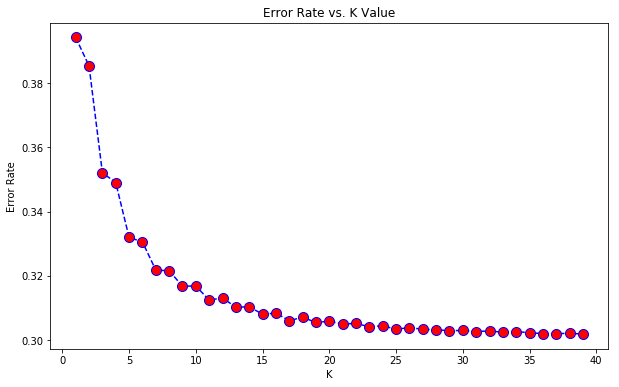

In [49]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [50]:
# NOW WITH K=20
knn = KNeighborsClassifier(n_neighbors=20)

knn.fit(X_train,y_train)
pred = knn.predict(X_test)

print('WITH K=20')
print('\n')
print(confusion_matrix(y_test,pred))
print('\n')
print(classification_report(y_test,pred))
#lol still bad

WITH K=20


[[43597 18610    31     0    16     4  1193]
 [17569 65805   978     0   120   377   129]
 [    4  2380  7225   144     2   837     0]
 [    0     5   491   295     0    37     0]
 [   23  2631    24     0   184     4     0]
 [    9  1635  2283    46     1  1405     0]
 [ 3601   132     0     0     0     0  2477]]


              precision    recall  f1-score   support

           1       0.67      0.69      0.68     63451
           2       0.72      0.77      0.75     84978
           3       0.65      0.68      0.67     10592
           4       0.61      0.36      0.45       828
           5       0.57      0.06      0.12      2866
           6       0.53      0.26      0.35      5379
           7       0.65      0.40      0.49      6210

   micro avg       0.69      0.69      0.69    174304
   macro avg       0.63      0.46      0.50    174304
weighted avg       0.69      0.69      0.68    174304



In [53]:
# D Tree with just 3 features

In [55]:
X = df2.drop('Cover_Type',axis=1)
y = df2['Cover_Type']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

In [56]:
dtree = DecisionTreeClassifier()
dtree.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [59]:
predictions = dtree.predict(X_test)
print(classification_report(y_test,predictions))
print(confusion_matrix(y_test,predictions))

              precision    recall  f1-score   support

           1       0.58      0.59      0.58     63473
           2       0.66      0.64      0.65     85342
           3       0.57      0.57      0.57     10638
           4       0.36      0.38      0.37       819
           5       0.18      0.19      0.18      2785
           6       0.34      0.36      0.35      5168
           7       0.45      0.46      0.45      6079

   micro avg       0.60      0.60      0.60    174304
   macro avg       0.45      0.46      0.45    174304
weighted avg       0.60      0.60      0.60    174304

[[37568 22535   105     0   326    87  2852]
 [24254 54805  2264     8  2051  1372   588]
 [  100  2000  6077   427    82  1952     0]
 [    0     9   360   314     0   136     0]
 [  308  1805   104     0   535    29     4]
 [   99  1237  1841   119    33  1839     0]
 [ 2730   578     0     0     1     0  2770]]


In [61]:
features = list(df2.columns[1:])
features

['elevation', 'aspect', 'slope']

In [ ]:
dot_data = StringIO()  
export_graphviz(dtree, out_file=dot_data,feature_names=features,filled=True,rounded=True)

graph = pydot.graph_from_dot_data(dot_data.getvalue())  
Image(graph[0].create_png())  

## Sources: 
**Data Sources and Documentation:**
- https://archive.ics.uci.edu/ml/datasets/Covertype
- http://rexa.info/paper/d44ba72ee840ac929fb2b78f6d9f6c6b408ff1da


**Extraction:** 
- https://realpython.com/python-string-split-concatenate-join/
- https://stackoverflow.com/questions/28595701/pandas-equivalent-of-rs-cbind-concatenate-stack-vectors-vertically
- https://stackoverflow.com/questions/34091877/how-to-add-header-row-to-a-pandas-dataframe
- https://www.shanelynn.ie/python-pandas-read_csv-load-data-from-csv-files/
- https://www.guru99.com/reading-and-writing-files-in-python.html
- https://stackoverflow.com/questions/31797013/how-to-open-a-data-file-extension

**Exploration**:
- https://www.datacamp.com/community/tutorials/categorical-data
- https://www.kaggle.com/pmarcelino/comprehensive-data-exploration-with-python
- https://stackoverflow.com/questions/29763620/how-to-select-all-columns-except-one-column-in-pandas/29763653
- https://www.kaggle.com/pmarcelino/comprehensive-data-exploration-with-python
- https://jakevdp.github.io/PythonDataScienceHandbook/04.14-visualization-with-seaborn.html
- https://seaborn.pydata.org/generated/seaborn.countplot.html
- https://seaborn.pydata.org/tutorial/categorical.html
- Categorical Data https://www.datacamp.com/community/tutorials/categorical-data 
- https://stackoverflow.com/questions/43131274/how-do-i-plot-two-countplot-graphs-side-by-side-in-seaborn
- https://stats.stackexchange.com/questions/159705/would-pca-work-for-boolean-binary-data-types
- https://www.kaggle.com/nextbigwhat/eda-for-categorical-variables-a-beginner-s-way
- https://towardsdatascience.com/dealing-with-categorical-data-fast-an-example-d4329b44253d
- https://github.com/samirgadkari/Predict_Functional_Water_Pumps_Tanzania_Kaggle/blob/master/Predictive_Modeling_Kaggle_Challenge.ipynb
- https://seaborn.pydata.org/generated/seaborn.clustermap.html
- https://stackoverflow.com/questions/42818670/pandas-dataframe-average-calculation




**General Syntax:**
- https://stackoverflow.com/questions/42202872/how-to-convert-list-to-row-dataframe-with-pandas
- https://chrisalbon.com/python/data_wrangling/pandas_rename_multiple_columns/
- https://stackoverflow.com/questions/42049147/convert-list-to-pandas-dataframe-column/42049158#42049158
- https://stackoverflow.com/questions/33575587/pandas-dataframe-how-to-apply-describe-to-each-group-and-add-to-new-columns
- https://towardsdatascience.com/the-dummys-guide-to-creating-dummy-variables-f21faddb1d40

**Feature Selection:**
- https://medium.com/@aneesha/recursive-feature-elimination-with-scikit-learn-3a2cbdf23fb7 
- https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.RFE.html#sklearn.feature_selection.RFE
- https://machinelearningmastery.com/feature-selection-in-python-with-scikit-learn/
- https://machinelearningmastery.com/feature-selection-in-python-with-scikit-learn/
- https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.RFE.html#sklearn.feature_selection.RFE
- https://medium.com/@aneesha/recursive-feature-elimination-with-scikit-learn-3a2cbdf23fb7
- PCA: 
    - https://scikit-learn.org/stable/auto_examples/neighbors/plot_nca_dim_reduction.html#sphx-glr-auto-examples-neighbors-plot-nca-dim-reduction-py 
    - Dimensionality Reduction: 
        - MCA: https://nbviewer.jupyter.org/github/esafak/mca/blob/master/docs/mca-BurgundiesExample.ipynb
        - https://pypi.org/project/mca/ 
        - https://stats.stackexchange.com/questions/159705/would-pca-work-for-boolean-binary-data-types

**Transformation:**

**Modeling:**
- https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html
- https://www.kdnuggets.com/2016/03/data-science-process.html
- https://towardsdatascience.com/train-test-split-and-cross-validation-in-python-80b61beca4b6
- https://github.com/janeyin600/Data_analysis/blob/master/train_test_split.ipynb
- https://stackoverflow.com/questions/30667525/importerror-no-module-named-sklearn-cross-validation
- https://stats.stackexchange.com/questions/189760/two-ways-of-predicting-a-categorical-variable
- https://towardsdatascience.com/train-test-split-and-cross-validation-in-python-80b61beca4b6 
- https://github.com/samirgadkari/Predict_Functional_Water_Pumps_Tanzania_Kaggle/blob/master/Predictive_Modeling_Kaggle_Challenge.ipynb
- https://towardsdatascience.com/dealing-with-categorical-data-fast-an-example-d4329b44253d
- Linear Regression: 
    - https://realpython.com/linear-regression-in-python/ 
    - https://towardsdatascience.com/train-test-split-and-cross-validation-in-python-80b61beca4b6
- Softmax Regression: 
    - http://mccormickml.com/2014/06/13/deep-learning-tutorial-softmax-regression/
    - https://www.kdnuggets.com/2016/07/softmax-regression-related-logistic-regression.html




**Loading:**

### Questions: 
- how do I use RFE??? AttributeError: 'DataFrame' object has no attribute 'data'
- deep dive into explaining/understanding a correlation matrix